In [232]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [233]:
raw_data = pd.read_csv('wave1.csv')
raw_data.head()

/Users/brentonbudler/AnacondaDownload/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,121,151) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,pid,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,w1_nc_intrv_y,w1_nc_duration,w1_nc_dob_m,w1_nc_dob_y,w1_nc_gen,...,w1_nc_intlng2,w1_nc_intlng3,w1_nc_intlng4,w1_nc_intlng5,w1_nc_intlng6,w1_nc_intlng7,w1_nc_intlng8,w1_nc_intlng9,w1_nc_intlng10,w1_nc_intlng11
0,301013,Successfully Interviewed,610,15th,June,2020,15.95,June,1981.0,Man,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301058,Successfully Interviewed,611,25th,June,2020,22.03,January,1948.0,Woman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301059,Successfully Interviewed,604,20th,June,2020,12.75,July,1990.0,Woman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,301062,Successfully Interviewed,640,25th,June,2020,22.33,June,1972.0,Woman,...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301067,Successfully Interviewed,609,15th,May,2020,15.2,July,1971.0,Woman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Demographics 

In [234]:
#Dino

# 2. Labour

This section includes an exploraroty data analysis of the varaibles pertaining to work, and factors effecting an individuals work.

## 2.1 Data Description 

**Education:** A persons education will effect what kind of work they do 
* **highest_grade** - Highest school grade completed/passed
* **tertiary_edu** - Successfully completed any tertiary 
<br><br>

**Work in February** 
* **job_in_feb** - Had any kind of job
* **work_in_feb** - Did work for profit/pay even just for an hour or a small amount 
* **bus_in_feb** - Did any businesss, big or small, even just for an hour
* **work_days_feb** - Average number of days worked per week 
* **work_hours_feb** - Average number of hours worked per day 
* **take_home_pay_feb** - Amount of take-home profit/pay in the month of February 
<br><br>

**Work in April** 
* **job_in_apr** - Had any kind of job
* **work_in_apr** - Did work for profit/pay even just for an hour or a small amount 
* **bus_in_apr** - Did any businesss, big or small, even just for an hour
* **work_days_apr** - Average number of days worked per week 
* **work_hours_apr** - Average number of hours worked per day 
* **take_home_pay_apr** - Amount of take-home profit/pay in the month of April 
* **return_to_job** - Have any paid activity/job to return to in the next 4 weeks (At time of survey)
* **not_working_reason** - Main reason for not working in April 
<br><br>

**Type of work** 
* **main_form_work** - Respondents main form of work 
* **usual_work** - Occupational code for usual work 

## 2.2 Data Ingestion

In [235]:
lbdf = pd.DataFrame()

lbdf['highest_grade'] = raw_data.w1_nc_edschgrd
lbdf['tertiary_edu'] = raw_data.w1_nc_edter

lbdf['job_in_feb'] = raw_data.w1_nc_em_feb
lbdf['work_in_feb'] = raw_data.w1_nc_emany_feb
lbdf['bus_in_feb'] = raw_data.w1_nc_ems_feb
lbdf['work_days_feb'] = raw_data.w1_nc_emdays_feb
lbdf['work_hours_feb'] = raw_data.w1_nc_emhrs_feb
lbdf['take_home_pay_feb'] = raw_data.w1_nc_eminc_feb

lbdf['job_in_apr'] = raw_data.w1_nc_em_apr
lbdf['work_in_apr'] = raw_data.w1_nc_emany_apr
lbdf['bus_in_apr'] = raw_data.w1_nc_ems_apr
lbdf['work_days_apr'] = raw_data.w1_nc_emdays_apr
lbdf['work_hours_apr'] = raw_data.w1_nc_emhrs_apr
lbdf['take_home_pay_apr'] = raw_data.w1_nc_eminc_apr
lbdf['return_to_job'] = raw_data.w1_nc_emreturn

lbdf['main_form_work'] = raw_data.w1_nc_emtyp
lbdf['usual_work'] = raw_data.w1_nc_emwrk_isco_c

## 2.3 Exploratory Data Analysis

In [236]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   highest_grade      7073 non-null   object
 1   tertiary_edu       5384 non-null   object
 2   job_in_feb         7073 non-null   object
 3   work_in_feb        3768 non-null   object
 4   bus_in_feb         3438 non-null   object
 5   work_days_feb      3408 non-null   object
 6   work_hours_feb     3141 non-null   object
 7   take_home_pay_feb  3408 non-null   object
 8   job_in_apr         6426 non-null   object
 9   work_in_apr        4954 non-null   object
 10  bus_in_apr         4769 non-null   object
 11  work_days_apr      2359 non-null   object
 12  work_hours_apr     1845 non-null   object
 13  take_home_pay_apr  1727 non-null   object
 14  return_to_job      4329 non-null   object
 15  main_form_work     2753 non-null   object
 16  usual_work         2359 non-null   object


Let us work through each column in the dataframe and explore the varaibles further

### Education 

In [237]:
lbdf['highest_grade'].value_counts()

Grade 12 (Std10 / Matric / Senior Certificate / Form 5)    3083
Grade 11 (Std. 9/ Form 4)                                  1147
Grade 10 (Std. 8/ Form 3)                                   696
Grade 9 (Std. 7/ Form 2)                                    387
Grade 7 (Std. 5)                                            342
Grade 8 (Std. 6/ Form 1)                                    332
No Schooling                                                210
Grade 6 (Std. 4)                                            169
Grade 5 (Std. 3)                                            152
Grade 4 (Std. 2)                                            123
Grade R/0                                                   120
Grade 3 (Std. 1)                                             80
Grade 2 (previously Sub B/ class 2)                          75
Grade 1 (previously Sub A/ class 1)                          41
Don't Know                                                   40
National Certificate Vocational 4 (NCV 4

In [238]:
lbdf.head()

,highest_grade,tertiary_edu,job_in_feb,work_in_feb,bus_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,job_in_apr,work_in_apr,bus_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,return_to_job,main_form_work,usual_work
0,Grade 9 (Std. 7/ Form 2),No,Yes,NaN,NaN,Donât know,NaN,180.0,No,No,No - I did nothing,NaN,NaN,NaN,Don't know,NaN,NaN
1,Grade R/0,NaN,"No, I'm retired",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grade 10 (Std. 8/ Form 3),Yes,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
3,Grade 10 (Std. 8/ Form 3),No,Yes,NaN,NaN,3.0,5.0,900.0,No,No,No - I did nothing,5.0,5.0,NaN,Yes,Regular job,Elementary occupations
4,Grade 9 (Std. 7/ Form 2),No,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN


In [239]:
lbdf.tail()

,highest_grade,tertiary_edu,job_in_feb,work_in_feb,bus_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,job_in_apr,work_in_apr,bus_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,return_to_job,main_form_work,usual_work
7068,Grade 11 (Std. 9/ Form 4),No,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
7069,Grade 10 (Std. 8/ Form 3),No,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
7070,N3 (NATED)/ NTC 3,No,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
7071,Grade 12 (Std10 / Matric / Senior Certificate ...,No,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
7072,Grade 11 (Std. 9/ Form 4),Yes,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN


In [240]:
def replace_errors(x):
    if x == "Other" or x == "Don't know" or x == "Refused" or x=='Missing' or x== "Don't Know" or x=="Donât know":
        return np.NaN
    return x

A custom data cleaning function helps us replace answers such as 'Refused' or 'Don't Know' with missing values

In [241]:
lbdf['highest_grade'] = lbdf['highest_grade'].apply(replace_errors)

In [242]:
grade_map = {
    'Grade 12 (Std10 / Matric / Senior Certificate / Form 5)': 'Grade 12',
    'Grade 11 (Std. 9/ Form 4)': 'Grade 11',
    'Grade 10 (Std. 8/ Form 3)': 'Grade 10', 
    'Grade 9 (Std. 7/ Form 2)':  'Grade 9', 
    'Grade 8 (Std. 6/ Form 1)':  'Grade 8', 
    'Grade 7 (Std. 5)':  'Grade 7', 
    'Grade 6 (Std. 4)':  'Grade 6', 
    'Grade 5 (Std. 3)':  'Grade 5', 
    'Grade 4 (Std. 2)':  'Grade 4', 
    'Grade 3 (Std. 1)':  'Grade 3',
    'Grade 2 (previously Sub B/ class 2)':  'Grade 2', 
    'Grade 1 (previously Sub A/ class 1)': 'Grade 1', 
    'Grade R/0': 'Grade 0', 
    'N1 (NATED)/ NTC 1': 'NTC 1',
    'N2 (NATED)/ NTC 2' : 'NTC 2',
    'N3 (NATED)/ NTC 3': 'NTC 3',
    'No Schooling': 'None',
    'National Certificate Vocational 2 (NCV 2)': 'NCV 2',
    'National Certificate Vocational 3 (NCV 3)': 'NCV 3',
    'National Certificate Vocational 4 (NCV 4)': 'NCV 4'
}

In [243]:
lbdf['highest_grade'] = lbdf['highest_grade'].map(grade_map)

In [244]:
grades = lbdf['highest_grade'].value_counts()
ordered_grades = grades.reindex(index = ['Grade 12', 'Grade 11', 'Grade 10', 'Grade 9', 'Grade 8','Grade 7',
       'Grade 6', 'Grade 5', 'Grade 4', 'Grade 3', 'Grade 2',
       'Grade 1', 'Grade 0' , 'NCV 4', 'NCV 3', 'NCV 2', 'NTC 3','NTC 2','NTC 1','None'])

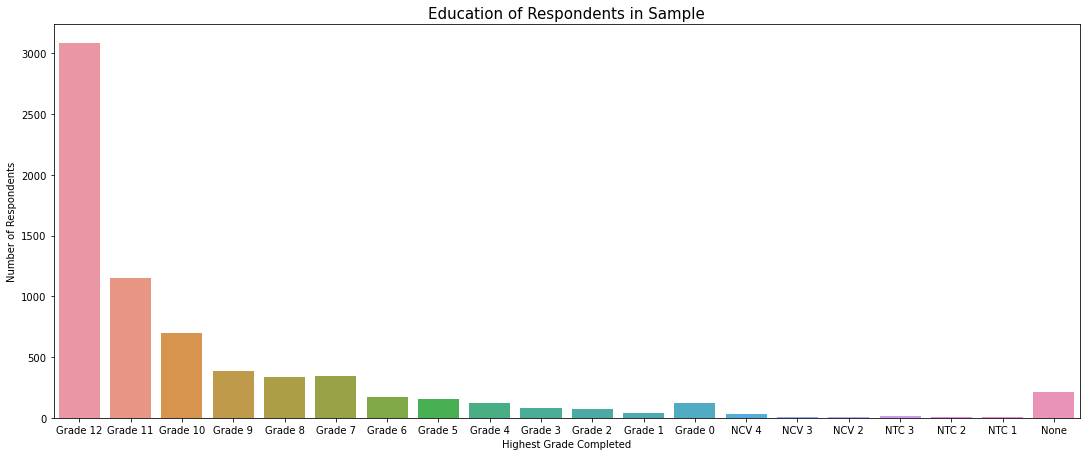

In [245]:
plt.figure(figsize=(15,6))
sns.barplot(x = ordered_grades.index, y = ordered_grades.values)
plt.tight_layout()
plt.title('Education of Respondents in Sample', fontsize= 15)
plt.xlabel('Highest Grade Completed')
plt.ylabel('Number of Respondents')
plt.show()

In [246]:
lbdf['tertiary_edu'].value_counts()

No            3558
Yes           1817
Don't know       6
Refused          3
Name: tertiary_edu, dtype: int64

In [247]:
lbdf['tertiary_edu'] = lbdf['tertiary_edu'].apply(replace_errors)

In [248]:
lbdf['tertiary_edu'].value_counts()

No     3558
Yes    1817
Name: tertiary_edu, dtype: int64

In [249]:
lbdf['tertiary_edu'].isnull().sum()/len(lbdf)*100

24.0067863707055

24% of the sample either refused to answer the question, answered that they did not know, or their answer is simply missing but out of the respondents who did answer let us look at how many said that they had completed a tertiary education.

Text(0.5, 1.0, 'Tertiary Education')

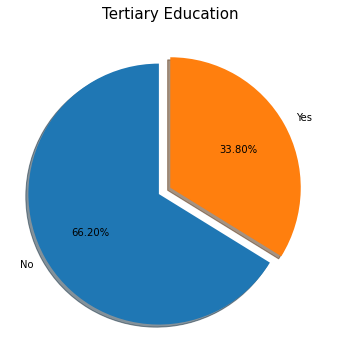

In [250]:
tert_perc = (lbdf['tertiary_edu'].value_counts()/lbdf['tertiary_edu'].value_counts().sum())*100
tert_perc.plot(kind='pie', explode = [0.1,0], figsize= (6,6), autopct='%1.2f%%', startangle = 90 , ylabel="",
            shadow = True)
plt.title('Tertiary Education', fontsize = 15)

### Labour

In [251]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   highest_grade      7028 non-null   object
 1   tertiary_edu       5375 non-null   object
 2   job_in_feb         7073 non-null   object
 3   work_in_feb        3768 non-null   object
 4   bus_in_feb         3438 non-null   object
 5   work_days_feb      3408 non-null   object
 6   work_hours_feb     3141 non-null   object
 7   take_home_pay_feb  3408 non-null   object
 8   job_in_apr         6426 non-null   object
 9   work_in_apr        4954 non-null   object
 10  bus_in_apr         4769 non-null   object
 11  work_days_apr      2359 non-null   object
 12  work_hours_apr     1845 non-null   object
 13  take_home_pay_apr  1727 non-null   object
 14  return_to_job      4329 non-null   object
 15  main_form_work     2753 non-null   object
 16  usual_work         2359 non-null   object


In [252]:
lbdf.loc[lbdf['job_in_feb']=="No, I'm retired",'job_in_apr']

1       NaN
6       NaN
8       NaN
18      NaN
32      NaN
       ... 
7036    NaN
7040    NaN
7045    NaN
7054    NaN
7062    NaN
Name: job_in_apr, Length: 647, dtype: object

As we can see respondents who answered that they were retired when asked about their job status in February, have missing values for their job status in April, we can fill these values in.

In [253]:
lbdf.loc[lbdf['job_in_feb']=="No, I'm retired",'job_in_apr'] = "No, I'm Retired"

In [254]:
lbdf['job_in_feb'] = lbdf['job_in_feb'].apply(replace_errors)
lbdf['job_in_apr'] = lbdf['job_in_apr'].apply(replace_errors)

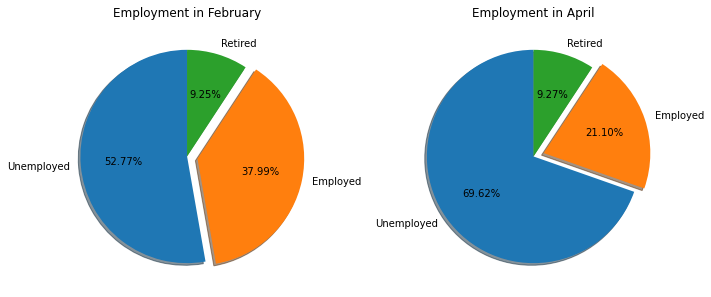

In [255]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,8))

emp_feb = lbdf['job_in_feb'].value_counts()/len(lbdf)*100
ax1.pie(emp_feb, labels= ['Unemployed','Employed','Retired'], autopct='%1.2f%%',startangle = 90,explode = [0,0.1,0],shadow = True)
ax1.set_title('Employment in February')

emp_apr = lbdf['job_in_apr'].value_counts()/len(lbdf)*100
ax2.pie(emp_apr, labels= ['Unemployed','Employed','Retired'], autopct='%1.2f%%',startangle = 90,explode = [0,0.1,0],shadow = True)
ax2.set_title('Employment in April')
plt.tight_layout()
plt.show()

As we can see there was a significatnt decrease in employment from February to April. Some respondents,however, may have only been doing part time work or were self-employed, let us see how these changed from February to April as well 

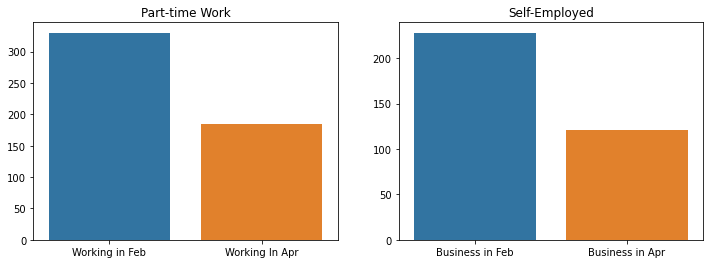

In [256]:
lbdf['work_in_feb'] = lbdf['work_in_feb'].apply(replace_errors)
lbdf['work_in_apr'] = lbdf['work_in_apr'].apply(replace_errors)
lbdf['bus_in_feb'] = lbdf['bus_in_feb'].apply(replace_errors)
lbdf['bus_in_apr'] = lbdf['bus_in_apr'].apply(replace_errors)

fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,4))

work_in_feb  = lbdf[lbdf['work_in_feb']=='Yes']
work_in_apr = lbdf[lbdf['work_in_apr']=='Yes']
sns.barplot(x = ['Working in Feb','Working In Apr'], y = [len(work_in_feb),len(work_in_apr)], ax=ax1)
ax1.set_title("Part-time Work")

bus_in_feb  = lbdf[lbdf['bus_in_feb']=='Yes']
bus_in_apr = lbdf[lbdf['bus_in_apr']=='Yes']
sns.barplot(x = ['Business in Feb','Business in Apr'], y = [len(bus_in_feb),len(bus_in_apr)], ax=ax2)
ax2.set_title("Self-Employed")

plt.show()

We can see that not only was there a significant drop in employment from February to April but there was also a significant drop in the number of respondents who were able to find part-time work or to do business. 

Although some people were able to keep there jobs let us examine how the number of days per week and number of hours per day that these people worked changed,.

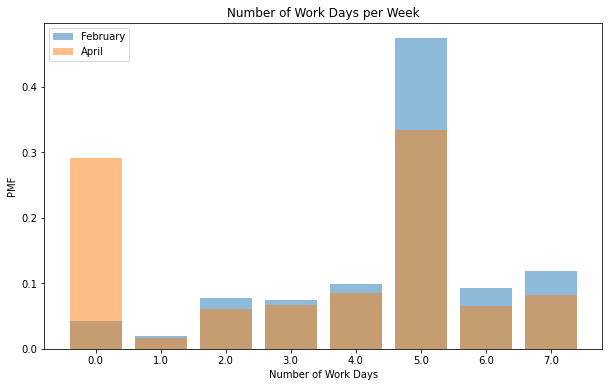

In [257]:
lbdf['work_days_feb'] = lbdf['work_days_feb'].apply(replace_errors)
lbdf['work_days_apr'] = lbdf['work_days_apr'].apply(replace_errors)
#Don't want to consider people who were on leave 
work_days_feb = lbdf.loc[lbdf['work_days_feb']!='I was on leave', 'work_days_feb']
work_days_feb = work_days_feb.value_counts().sort_index()/work_days_feb.value_counts().sum()

work_days_apr = pd.to_numeric(lbdf.loc[lbdf['work_days_apr']!='I was on leave', 'work_days_apr'])
work_days_apr = work_days_apr.value_counts().sort_index()/work_days_apr.value_counts().sum()

plt.figure(figsize=(10,6))
plt.bar(x = work_days_feb.index, height = work_days_feb.values, alpha=0.5, label = 'February')
plt.bar(x = work_days_apr.index, height = work_days_apr.values, alpha=0.5, label = 'April')
plt.legend(loc=2)
plt.title('Number of Work Days per Week')
plt.xlabel('Number of Work Days')
plt.ylabel('PMF')
plt.show()

We can see that there was definitely a decrease in the number of days people were working per week. Let us explore how the numebr of hours they worked per day changed as well.

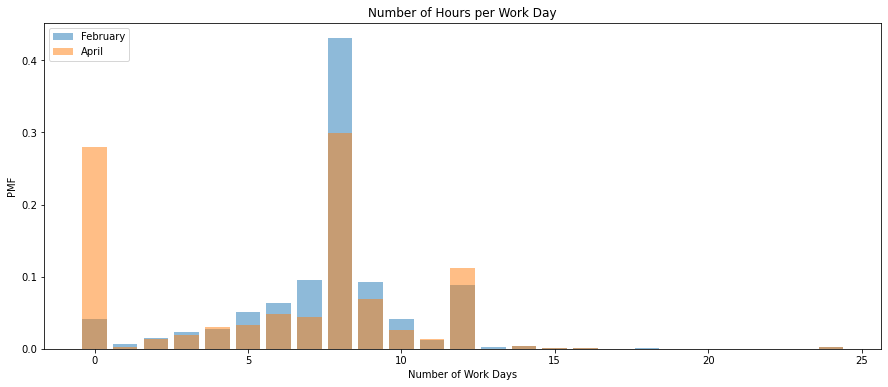

In [258]:
lbdf['work_hours_feb'] = lbdf['work_hours_feb'].apply(replace_errors)
lbdf['work_hours_apr'] = lbdf['work_hours_apr'].apply(replace_errors)

work_hours_feb = pd.to_numeric(lbdf['work_hours_feb']).value_counts().sort_index()
work_hours_apr = pd.to_numeric(lbdf['work_hours_apr']).value_counts().sort_index()

work_hours_feb = work_hours_feb/ work_hours_feb.sum()
work_hours_apr = work_hours_apr/ work_hours_apr.sum()

plt.figure(figsize=(15,6))
plt.bar(x = work_hours_feb.index, height = work_hours_feb.values, alpha=0.5, label = 'February')
plt.bar(x = work_hours_apr.index, height = work_hours_apr.values, alpha=0.5, label = 'April')
plt.legend(loc=2)
plt.title('Number of Hours per Work Day')
plt.xlabel('Number of Work Days')
plt.ylabel('PMF')
plt.show()

We can see that the number of hours people were working also decreaesed in most cases with a significant increase in the amount of people working for less than an hour a day. 

For those people who unfortunately did lose their job between february and april, let us see how many of them said that they would be able to return to work in the 4 weeks after they were interviewed.

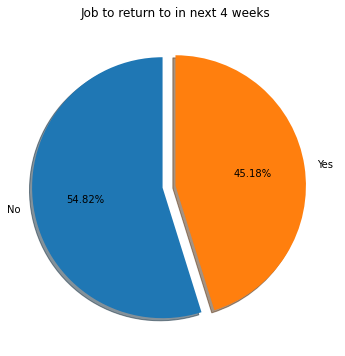

In [259]:
lbdf['return_to_job'] = lbdf['return_to_job'].apply(replace_errors)
lost_job = lbdf[(lbdf['job_in_feb']=='Yes') & (lbdf['job_in_apr']=='No')]
return_to_job = (lost_job['return_to_job'].value_counts()/ lost_job['return_to_job'].value_counts().sum())*100

return_to_job.plot(kind='pie', explode = [0.1,0], figsize= (6,6), autopct='%1.2f%%', startangle = 90 , ylabel="",
            shadow = True)
plt.title("Job to return to in next 4 weeks")
plt.show()

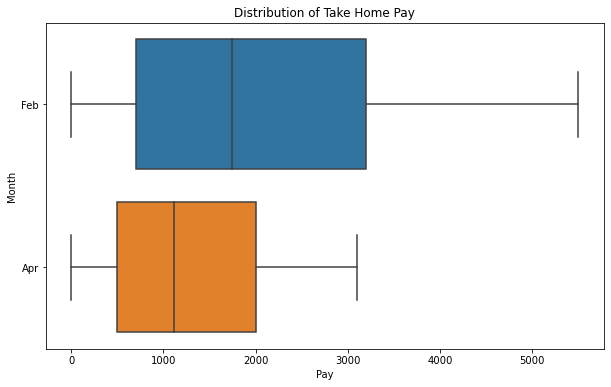

In [260]:
#First we replace errors, remove null values and make the target column numeric
lbdf['take_home_pay_feb'] = lbdf['take_home_pay_feb'].apply(replace_errors)
pay_in_feb = pd.to_numeric(lbdf.loc[lbdf['take_home_pay_feb'].notnull() ,'take_home_pay_feb'])
lbdf['take_home_pay_apr'] = lbdf['take_home_pay_apr'].apply(replace_errors)
pay_in_apr = pd.to_numeric(lbdf.loc[lbdf['take_home_pay_apr'].notnull() ,'take_home_pay_apr'])

#Due to the presence of several outliers, the original distirbution is heavily skewed 
#By taking a subset of our data which lies within 1.5 * Interquartile Range of the Median we are able 
#To create a better visual representation of the take home pay distribution 
pay_in_feb = pay_in_feb[pay_in_feb<pay_in_feb.quantile(0.75)]
pay_in_apr = pay_in_feb[pay_in_feb<pay_in_feb.quantile(0.75)]

#Now the creation of a dataframe allows us to use Seaborns boxplot functionality 
feb_df = pd.DataFrame()
feb_df['Pay'] = pay_in_feb
feb_df['Month'] = 'Feb'
apr_df = pd.DataFrame()
apr_df['Pay'] = pay_in_apr
apr_df['Month'] = 'Apr'
pay_df = pd.concat([feb_df,apr_df])

#Creating the Plot
plt.figure(figsize=(10,6))
sns.boxplot(y = 'Month', x = 'Pay', data = pay_df)
plt.title('Distribution of Take Home Pay')
plt.show()

From these distributions we can clearly see that the median take home pay was reduced.

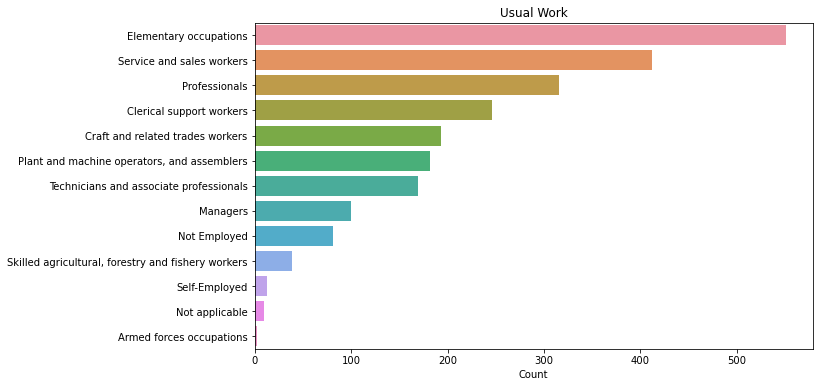

In [261]:
lbdf['usual_work'] = lbdf['usual_work'].apply(replace_errors)
usual_work = lbdf['usual_work'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y = usual_work.index, x = usual_work.values)
plt.xlabel('Count')
plt.title("Usual Work")
plt.show()

In [308]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   highest_grade      7028 non-null   object
 1   tertiary_edu       5375 non-null   object
 2   job_in_feb         6997 non-null   object
 3   work_in_feb        3684 non-null   object
 4   bus_in_feb         3356 non-null   object
 5   work_days_feb      3168 non-null   object
 6   work_hours_feb     3018 non-null   object
 7   take_home_pay_feb  2653 non-null   object
 8   job_in_apr         6976 non-null   object
 9   work_in_apr        4833 non-null   object
 10  bus_in_apr         4652 non-null   object
 11  work_days_apr      2142 non-null   object
 12  work_hours_apr     1790 non-null   object
 13  take_home_pay_apr  1402 non-null   object
 14  return_to_job      3977 non-null   object
 15  main_form_work     2753 non-null   object
 16  usual_work         2313 non-null   object


# 3. Welfare

In [262]:
# Philani

 Data Cleaning

One potential model we are looking at contructing is logistic regression model which can predict who was most likely to lose their jobs upon the initial impact of COVID19. We will use variables from both the labour and the demographics section. These variables include:
* Respondents Age
* Highest School Grade Completed 
* Which province they were in during lockdown 
* Whether or not they moved provinces 
* The amount of work they did 
* The amount they were paid 
* The usual work they did 

And these willl all be used to predict whether or not someone lost their job. 

In [263]:
model_df = pd.DataFrame()

model_df['Grade'] = lbdf['highest_grade']
model_df['YearOfBirth'] = raw_data['w1_nc_dob_y']
model_df['MovedProvince'] = raw_data['w1_nc_moveprov']

In [264]:
def check_province(moved, prov_dur, curr_prov):
    if moved == "Yes":
        return prov_dur
    else:
        return curr_prov

In [265]:
model_df['Province'] = np.vectorize(check_province)(raw_data["w1_nc_moveprov"],raw_data["w1_nc_lvdurprov"],raw_data["w1_nc_prov"])

In [266]:
model_df['DaysWorked'] = lbdf['work_days_feb']
model_df['HoursWorked'] = lbdf['work_hours_feb']
model_df['Income'] = lbdf['take_home_pay_feb']
model_df['UsualWork'] = lbdf['usual_work']

In [267]:
def check_labour(jobfeb, workfeb, busfeb):
    if jobfeb == "Yes" or workfeb == "Yes" or busfeb =="Yes":
        return 1 
    else:
        return 0 

In [268]:
model_df['HadLabour'] = np.vectorize(check_labour)(lbdf['job_in_feb'],lbdf['work_in_feb'],lbdf['bus_in_feb'])

In [269]:
def lost_job(jobfeb, workfeb, busfeb, jobapr,workapr,busapr):
    if(jobfeb=="Yes" and jobapr=="No"):
        return 1
    elif(workfeb=="Yes" and workapr=="No"):
        return 1 
    elif(busfeb=="Yes" and busapr=="No"):
        return 1 
    else:
        return 0 

In [270]:
model_df['LostLabour'] = np.vectorize(lost_job)(lbdf['job_in_feb'],lbdf['work_in_feb'],lbdf['bus_in_feb'],lbdf['job_in_apr'],lbdf['work_in_apr'],lbdf['bus_in_apr'])

In [271]:
model_df.head()

,Grade,YearOfBirth,MovedProvince,Province,DaysWorked,HoursWorked,Income,UsualWork,HadLabour,LostLabour
0,Grade 9,1981.0,No,Gauteng,NaN,NaN,180.0,NaN,1,1
1,Grade 0,1948.0,No,KwaZulu-Natal,NaN,NaN,NaN,NaN,0,0
2,Grade 10,1990.0,No,Gauteng,NaN,NaN,NaN,NaN,0,0
3,Grade 10,1972.0,No,Gauteng,3.0,5.0,900.0,Elementary occupations,1,1
4,Grade 9,1971.0,No,Gauteng,NaN,NaN,NaN,NaN,0,0


We only want to look at the cases where they did have some sort job/work/business in Feb

In [272]:
model_df = model_df.loc[model_df['HadLabour']==1,:]
model_df = model_df.drop("HadLabour",axis=1)
model_df.head()

,Grade,YearOfBirth,MovedProvince,Province,DaysWorked,HoursWorked,Income,UsualWork,LostLabour
0,Grade 9,1981.0,No,Gauteng,NaN,NaN,180.0,NaN,1
3,Grade 10,1972.0,No,Gauteng,3.0,5.0,900.0,Elementary occupations,1
9,Grade 10,1989.0,No,Gauteng,6.0,10.0,8000.0,NaN,1
10,Grade 12,1972.0,No,KwaZulu-Natal,3.0,8.0,4600.0,NaN,1
15,Grade 12,1968.0,No,Gauteng,5.0,8.0,25000.0,Technicians and associate professionals,0


## 4.1 - Missing Data

In [273]:
(model_df.isnull().sum()/ len(model_df))*100

Grade             0.373134
YearOfBirth       0.031095
MovedProvince     0.000000
Province          0.000000
DaysWorked        4.788557
HoursWorked       9.172886
Income           20.926617
UsualWork        40.049751
LostLabour        0.000000
dtype: float64

Only 0.37% of our sample is missing grade

In [274]:
model_df = model_df[model_df['Grade'].notnull()]

Because Grade is an ordered categroical feature we will want some way to order them, unfortunately the inclusion of the NTC and NCV levels makes this difficult as there is no direct grade equivalent for these qualifications. Let us see how many respondents in our sample have these qualifications 

In [275]:
not_standard  = model_df['Grade'].value_counts().sort_index()[-6:]
(not_standard.sum()/len(model_df))*100

1.9038701622971288

Only about 2% of sample have these qualifications. To allows us to use this ordering we will remove them from the sample.

In [276]:
model_df = model_df.loc[(model_df['Grade'] != 'NCV 2') & (model_df['Grade'] != 'NCV 3') & (model_df['Grade'] != 'NCV 4')& (model_df['Grade'] != 'NTC 1')&(model_df['Grade'] != 'NTC 2') &(model_df['Grade'] != 'NTC 3')]

In [277]:
(model_df['YearOfBirth'].isnull().sum()/ len(model_df))*100

0.0315955766192733

Less than 0.05% of our sample have missing birth years let us drop those null values as well 

In [278]:
model_df = model_df[model_df['YearOfBirth'].notnull()]

In [281]:
model_df['DaysWorked'].value_counts()

5.0               1466
7.0                370
4.0                297
6.0                286
2.0                235
3.0                231
1.0                 63
0.0                 44
I was on leave      20
Name: DaysWorked, dtype: int64

People who were on leave intefer with this being a numerical values so we will get rid of them 

In [285]:
model_df = model_df[model_df['DaysWorked']!='I was on leave']

In [289]:
pd.to_numeric(model_df['DaysWorked']).mean()

4.695855614973262

We can see the average number of days worked is closest to 5, lets impute these values .

In [290]:
model_df.loc[model_df['DaysWorked'].isnull()]

,Grade,YearOfBirth,MovedProvince,Province,DaysWorked,HoursWorked,Income,UsualWork,LostLabour
0,Grade 9,1981.0,No,Gauteng,NaN,NaN,180.0,NaN,1
77,Grade 10,1976.0,No,Limpopo,NaN,NaN,980.0,NaN,0
119,Grade 11,1977.0,No,Gauteng,NaN,NaN,1300.0,NaN,1
123,Grade 12,1981.0,No,Free State,NaN,NaN,250.0,NaN,1
153,Grade 12,1971.0,No,Mpumalanga,NaN,NaN,12.0,Service and sales workers,0
...,...,...,...,...,...,...,...,...,...
6705,Grade 2,1986.0,No,Eastern Cape,NaN,NaN,0.0,NaN,0
6761,Grade 12,1990.0,Yes,Western Cape,NaN,NaN,NaN,Craft and related trades workers,0
6958,Grade 11,1978.0,No,Northern Cape,NaN,NaN,600.0,Elementary occupations,0
6985,Grade 6,1982.0,No,KwaZulu-Natal,NaN,NaN,NaN,NaN,1


In [124]:
not_standard  = model_df['Grade'].value_counts().sort_index()[-6:]
not_standard

NCV 2     6
NCV 3     3
NCV 4    16
NTC 1     2
NTC 2     1
NTC 3    11
Name: Grade, dtype: int64

In [127]:
(not_standard.sum()/len(model_df))*100

1.212686567164179

We can see that just over one percent of our sample has a highest grade that is not one of the standard grades (Grade 0-12). Let's see how much of the other information these records have.

In [133]:
model_df[(model_df['Grade'] == 'NCV 2') | (model_df['Grade'] == 'NCV 3') | (model_df['Grade'] == 'NCV 4')| (model_df['Grade'] == 'NTC 1')|(model_df['Grade'] == 'NTC 2') |(model_df['Grade'] == 'NTC 3')]

,Grade,YearOfBirth,MovedProvince,Province,DaysWorked,HoursWorked,Income,UsualWork,LostLabour
336,NCV 4,1969.0,No,Mpumalanga,7.0,10.0,30000.0,Craft and related trades workers,0
379,NCV 4,1984.0,No,Western Cape,4.0,8.0,NaN,NaN,1
486,NCV 4,1948.0,No,Limpopo,2.0,NaN,150.0,NaN,0
598,NCV 2,1979.0,No,Gauteng,6.0,8.0,4000.0,Service and sales workers,1
941,NCV 3,1970.0,No,Mpumalanga,2.0,8.0,20000.0,NaN,1
1067,NCV 4,1988.0,No,Gauteng,4.0,8.0,21000.0,Professionals,0
1109,NTC 3,1985.0,No,Gauteng,5.0,8.0,2500.0,NaN,1
1175,NTC 3,1980.0,No,Western Cape,4.0,8.0,NaN,Craft and related trades workers,0
1224,NCV 2,1971.0,No,North West,5.0,8.0,10000.0,Managers,0
1405,NTC 3,1963.0,No,Gauteng,I was on leave,NaN,NaN,NaN,1


In [375]:
grade_map = {
    'Grade 12 (Std10 / Matric / Senior Certificate / Form 5)': 12,
    'Grade 11 (Std. 9/ Form 4)':11,
    'Grade 10 (Std. 8/ Form 3)':10, 
    'Grade 9 (Std. 7/ Form 2)': 9, 
    'Grade 8 (Std. 6/ Form 1)': 8, 
    'Grade 7 (Std. 5)': 7, 
    'Grade 6 (Std. 4)': 6, 
    'Grade 5 (Std. 3)': 5, 
    'Grade 4 (Std. 2)': 4, 
    'Grade 3 (Std. 1)': 3,
    'Grade 2 (previously Sub B/ class 2)': 2, 
    'Grade 1 (previously Sub A/ class 1)': 1, 
    'Grade R/0': 0, 
    #'No Schooling': -1,
}